<a href="https://colab.research.google.com/github/hyeonji826/Linear-Algebra/blob/main/5_Transposes%2C_Permutations%2C_Spaces_R%5En.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 1
- **전치(Transpse)**
    - 행렬의 전치는 행과 열을 뒤바꾸어 새로운 행렬 A^T를 만드는 연산이다.
    - 즉, 행렬을 대각선을 기준으로 뒤집는(Flip) 것으로, 이 과정에서 원소의 위치가 (i, j)에서 (j, i)로 이동합니다.



- **대칭 행렬(Symmetric Matrix)**
    - 전치한 결과가 원래의 행렬과 같은 행렬로, 대각선을 기준으로 좌우대칭이다.
    - 대칭 행렬은 고유값/고유벡터 계산, 통계(공분산), 머신러닝(SVM)등 다양한 분야에서 활용된다.
    - 임의의 행렬 A에 대해 A*A^T는 항상 대칭 행렬이 된다.
    

In [1]:
# Chapter 1 실습코드
import numpy as np

# 임의의 행렬 A 생성
A = np.random.rand(3,4)
print("행렬 A:")
print(A)

# 행렬의 전치 A^T 생성
A_T =A.T
print("\n행렬 A의 전치 (A^T):")
print(A_T)

# A와 A^T의 곱으로 대칭 행렬 생성
symmetric_matrix = np.dot(A,A_T)
print("\nA * A^T (대칭 행렬):")
print(symmetric_matrix)

# 결과 행렬이 대칭인지 확인 (symmetric_matrix == symmetric_matrix^T)
is_symmetric = np.allclose(symmetric_matrix, symmetric_matrix.T)
print("\nA *A^T는 대칭 행렬인가요? =>", is_symmetric)

행렬 A:
[[0.64316847 0.34614203 0.32523691 0.11037883]
 [0.45275348 0.57077681 0.80807326 0.24671144]
 [0.74194861 0.62828499 0.09015675 0.73430163]]

행렬 A의 전치 (A^T):
[[0.64316847 0.45275348 0.74194861]
 [0.34614203 0.57077681 0.62828499]
 [0.32523691 0.80807326 0.09015675]
 [0.11037883 0.24671144 0.73430163]]

A * A^T (대칭 행렬):
[[0.65144251 0.77881357 0.80504744]
 [0.77881357 1.2446208  0.94854418]
 [0.80504744 0.94854418 1.49255689]]

A *A^T는 대칭 행렬인가요? => True


## Chapter 2
### 치환행렬
- 정의
    - 치환 행렬은 각 행과 각 열에 단 하나의 1이 존재하고, 나머지 원소는 모두 0인 정사각 행렬입니다. 이 행렬은 m개의 원소 순서를 바꾸는 하나의 치환을 나타냅니다.
- 용도
    - 행렬 소거법이나 LU 분해 같은 연산에서 피봇(pivot)이 0인 경우 행 교환(row exchange)이 필요할 때 사용됩니다. 예를 들어, A=LU 분해에서는 행 교환이 필요 없으면 P(치환 행렬)가 단위행렬이 되지만, 피봇이 0일 때는 P행렬을 곱하여 적절한 행 교환을 수행합니다.


- 특징
    - 모든 치환 행렬은 역행렬을 가지며, 그 역행렬은 전치행렬과 동일하다.
    - 즉, **P^-1 = P^T**이며, P*P^T는 항등행렬이 된다.
    - 행 교환의 조합으로 **n!** (n은 행의 개수) 가지의 경우가 존재할 수 있다.

In [3]:
# Chapter 2 실습코드
import numpy as np

# 1. 치환 행렬 생성
# 예시) 4x4 단위행렬에서 행 0과 행 2를 교환하는 치환 행렬 생성
n = 4
I = np.eye(n)
# 행 교환 순서 : 0번째 행과 2번째 행을 교환, 나머지는 그대로
permutation_order = [2,1,0,3]
P = I[permutation_order, :]

print("치환 행렬 P :")
print(P)

# 각 행과 각 열에 1이 하나씩 있느지 확인
print("\n각 행의 합:",P.sum(axis=1))
print("\n각 열의 합:",P.sum(axis=0))

# 2. 치환 행렬의 용도 : 행 교환
A = np.arange(1,13).reshape(4,3)
print("\n원본 행렬 A:")
print(A)

# 치환 행렬 P를 A에 곱하면, A의 행 순서가 permutation_order에 따라 변경됨
PA = np.dot(P,A)
print("\nP * A (행 교환 후의 행렬):")
print(PA)

# 3. 치환 행렬의 특징 확인
# 모든 치환 행렬은 역행렬이 존재하며, 그 역행렬은 전치 행렬과 동일하다.
P_inv = np.linalg.inv(P)
P_T = P.T

print("\n치환 행렬 P의 역행렬 (P^-1):")
print(P_inv)
print("\n치환 행렬 P의 전치 행렬 (P^T):")
print(P_T)
print("\nP^-1 와 P^T가 동일한가? =>", np.allclose(P_inv,P_T))

# P * P^T는 항등행렬이 된다.
I_from_P = np.dot(P,P_T)
print("\nP * P^T 의 결과 (항등행렬이어야 함):")
print(I_from_P)
print("\nP * P^T가 항등행렬과 동일한가? =>",np.allclose(I_from_P,np.eye(n)))

치환 행렬 P :
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

각 행의 합: [1. 1. 1. 1.]

각 열의 합: [1. 1. 1. 1.]

원본 행렬 A:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

P * A (행 교환 후의 행렬):
[[ 7.  8.  9.]
 [ 4.  5.  6.]
 [ 1.  2.  3.]
 [10. 11. 12.]]

치환 행렬 P의 역행렬 (P^-1):
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

치환 행렬 P의 전치 행렬 (P^T):
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

P^-1 와 P^T가 동일한가? => True

P * P^T 의 결과 (항등행렬이어야 함):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

P * P^T가 항등행렬과 동일한가? => True


## Chapter 3
### R^n의 부분공간
- 벡터 공간과 부분 공간
    - **벡터 공간**은 벡터 덧셈과 스칼라 곱에 대해 닫힌 집합이며, 모든 연산 결과가 같은 공간 내에 존재해야 한다.
    - **부분 공간**은 원점을 포함하는 벡터 공간의 하위 집합으로, 덧셈과 스칼라 곱에 대해 닫혀 있어야 한다.
    - **필수 조건**
        - 반드시 원전(영벡터)을 포함해야 한다.
        - 두 벡터를 더한 결과와 임의의 스칼라를 곱한 결과 역시 해당 부분 공간 내에 있어야 한다.

- Ex)
    - R^2의 경우 : 전체 공간, 원점을 지나는 곡선, 그리고 영벡터만으로 구성된 한 점 공간이 부분 공간이 된다.
    - **행렬의 column space** 역시 부분 공간의 한 예이다.
        - 행렬의 column space
            - 행렬 A의 모든 ,column들에 대해 가능한 선형 결합(Linear Combination)을 취하면 형성되는 집합을  column space라고 하며, 이는 R^n의 부분 공간의 한 예로 볼 수 있다.



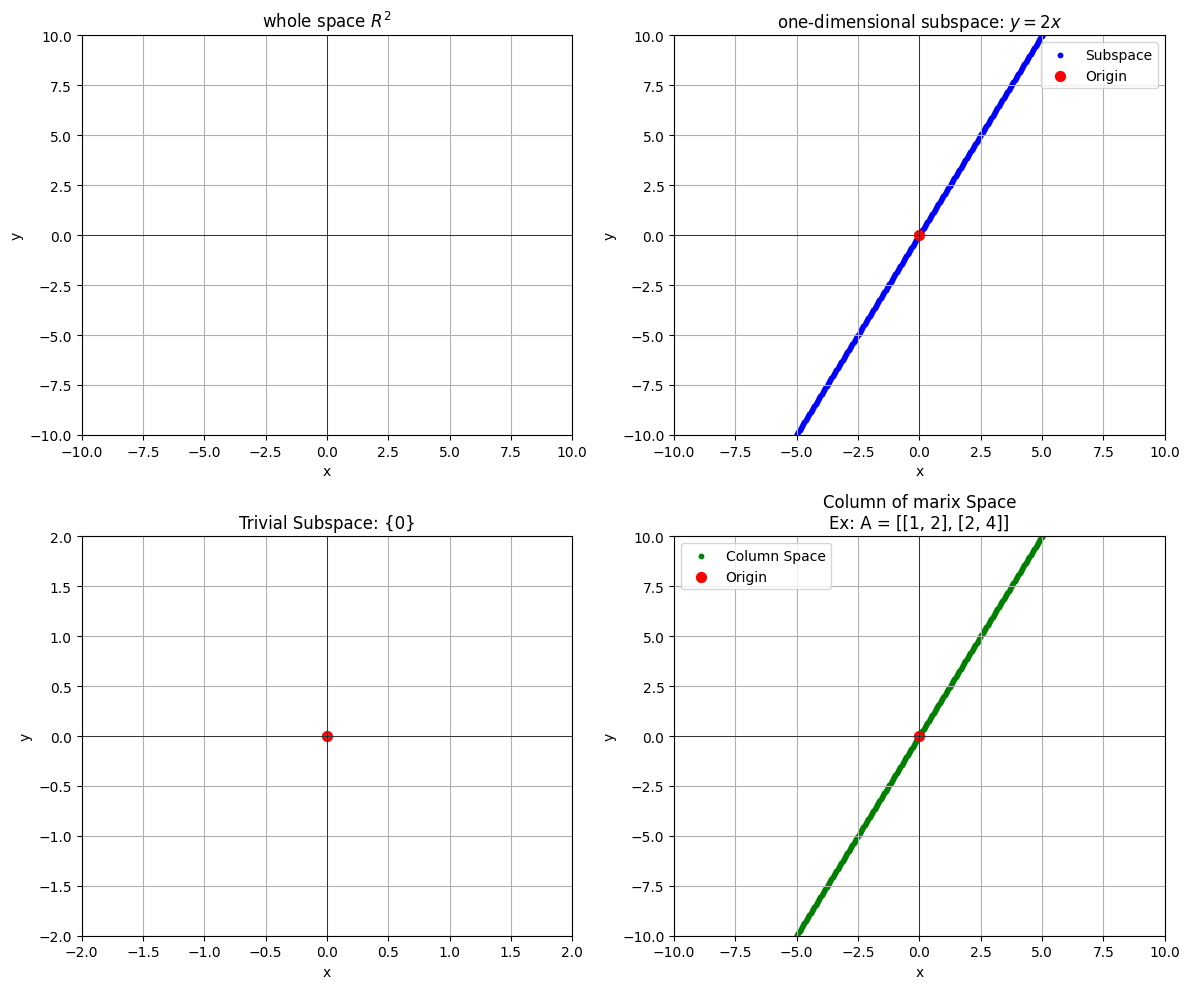

In [13]:
# Chapter 3 실습코드
import numpy as np
import matplotlib.pyplot as plt

# usetex 비활성화 (기본 mathtext 사용)
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False

# 데이터 준비 (방법 1과 동일)
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
x_line = np.linspace(-10, 10, 400)
y_line = 2 * x_line
zero_point = np.array([0, 0])
A = np.array([[1, 2],
              [2, 4]])
v = A[:, 0]
scalars = np.linspace(-10, 10, 400)
col_space = np.outer(scalars, v)

# 서브플롯 생성 (2행 2열)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# (1) 전체 공간 R^2
ax = axes[0, 0]
ax.set_title("whole space $R^2$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.grid(True)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# (2) 1차원 부분공간: y=2x
ax = axes[0, 1]
ax.set_title("one-dimensional subspace: $y=2x$")
ax.scatter(x_line, y_line, color='blue', s=10, label='Subspace')
ax.scatter(zero_point[0], zero_point[1], color='red', s=50, label='Origin')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.grid(True)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.legend()

# (3) Trivial Subspace: {0}
ax = axes[1, 0]
ax.set_title("Trivial Subspace: {0}")
ax.scatter(zero_point[0], zero_point[1], color='red', s=50)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.grid(True)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# (4) 행렬의 Column Space (LaTeX 환경 없이 간단하게 표시)
ax = axes[1, 1]
ax.set_title("Column of marix Space\nEx: A = [[1, 2], [2, 4]]")
ax.scatter(col_space[:, 0], col_space[:, 1], color='green', s=10, label='Column Space')
ax.scatter(zero_point[0], zero_point[1], color='red', s=50, label='Origin')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.grid(True)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.legend()

plt.tight_layout()
plt.show()




## Chapter 4
### 딥러닝에서 대칭행렬 활용
서포트 벡터 머신(SVM)과 대칭행렬
- **서포트 벡터 머신(SVM)**
    - SVM은 데이터 포인트 간의 마진(거리)을 최대화하는 하이퍼플레인을 찾기 위한 알고리즘이다.
- **커널 트릭(Kernel Trick)**
    - SVM에서는 데이터를 고차원 공간으로 매핑하기 위해 커널 함수를 사용한다. 일반적으로 선형, 다항식, 또는 RBF(방사형 기저 함수) 커널이 사용된다.
    - 커널 함수는 데이터 포인트 간의 내적을 계산하는데, 이때 형성되는 그램(Gram)행렬은 본질적으로 대칭 행렬이다.

- 이중형 최적화(Dual Form Optimization)
: SVM 문제는 라그랑주 승수를 포함하는 이중형 최적화 문제로 변환되며, 이 과정에서 대칭인 그램 행렬이 중요한 역할이다.
    - 단, 대칭 행렬이 직접적으로 마진 거리 최대화와 연결되기보다는, 최적의 하이퍼플레인과 지원벡터를 찾기 위한 수학적 프레임워크의 일부로 작용한다.

Gram matrix symmetric: True


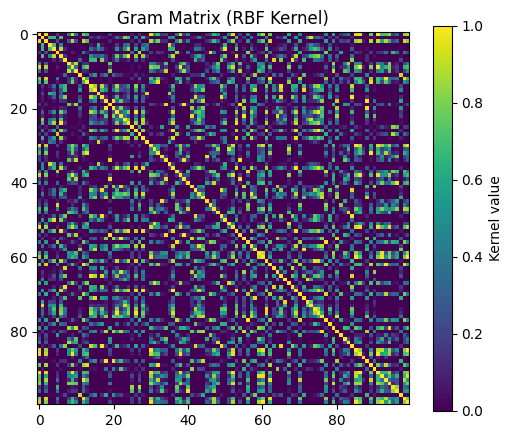

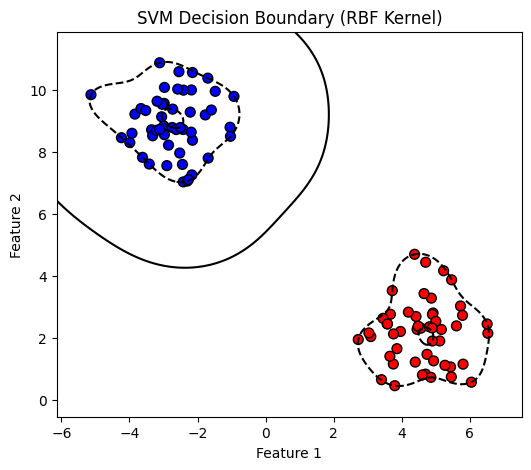

In [14]:
# Chpater 4 실습 코드
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel

# 1. 데이터 생성: 2개의 클래스로 구성된 2차원 데이터셋
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

# 2. RBF 커널을 사용하여 Gram 행렬 계산
gamma = 0.5  # RBF 커널의 gamma 파라미터
K = rbf_kernel(X, gamma=gamma)

# Gram 행렬이 대칭인지 확인
print("Gram matrix symmetric:", np.allclose(K, K.T))

# 3. Gram 행렬 시각화
plt.figure(figsize=(6, 5))
plt.imshow(K, interpolation='nearest', cmap='viridis')
plt.title("Gram Matrix (RBF Kernel)")
plt.colorbar(label="Kernel value")
plt.show()

# 4. SVM 학습 (커널 SVM: RBF kernel)
clf = SVC(kernel='rbf', gamma=gamma)
clf.fit(X, y)

# 5. SVM 결정 경계 시각화
plt.figure(figsize=(6, 5))
# 데이터 포인트 표시
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50)

# 결정 경계 시각화를 위한 격자(grid) 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# 격자상의 점들에 대해 SVM의 결정 함수 값 계산
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 결정 경계 및 마진 (margin)을 등고선으로 표시
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k',
            linestyles=['--', '-', '--'])
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
